# [**The Full Original Tutorial**](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
What is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

1.Getting Started
---------------

Tensors
^^^^^^^

Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# torch.empty()
torch.empty((2, 4))

tensor([[1.5785e-35, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [3]:
# torch.rand() 
torch.rand((5, 4))

tensor([[0.3357, 0.2779, 0.7149, 0.1531],
        [0.7164, 0.6233, 0.8728, 0.3748],
        [0.3809, 0.3571, 0.7083, 0.3516],
        [0.9869, 0.1335, 0.9963, 0.0209],
        [0.2745, 0.5715, 0.7527, 0.5300]])

In [4]:
# torch.zeros()
torch.zeros(5, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [5]:
# torch.tensor()
torch.tensor([1, 2, 3])

tensor([1, 2, 3])

In [6]:
# torch.randn_like()
a = torch.tensor([1, 2])
torch.rand_like(a)

RuntimeError: ignored

In [7]:
# size()
b = torch.rand((5, 4))
b.size()

torch.Size([5, 4])

In [8]:
# torch.add()
a = torch.rand((5, 4))
b = torch.rand((5, 4))
torch.add(a, b)

tensor([[0.7615, 1.0176, 1.0587, 0.4069],
        [0.6767, 0.6298, 1.3750, 0.5455],
        [1.1147, 0.0855, 1.1266, 0.8005],
        [1.0865, 1.5210, 1.8576, 0.8064],
        [0.9085, 0.7419, 1.4208, 1.0170]])

In [9]:
a.add(b)

tensor([[0.7615, 1.0176, 1.0587, 0.4069],
        [0.6767, 0.6298, 1.3750, 0.5455],
        [1.1147, 0.0855, 1.1266, 0.8005],
        [1.0865, 1.5210, 1.8576, 0.8064],
        [0.9085, 0.7419, 1.4208, 1.0170]])

In [10]:
c = a + b
c

tensor([[0.7615, 1.0176, 1.0587, 0.4069],
        [0.6767, 0.6298, 1.3750, 0.5455],
        [1.1147, 0.0855, 1.1266, 0.8005],
        [1.0865, 1.5210, 1.8576, 0.8064],
        [0.9085, 0.7419, 1.4208, 1.0170]])

In [11]:
# item()
c[1, 1].item()

0.6297785043716431

In [12]:
# a.numpy()
# torch.from_numpy()
c.numpy()

array([[0.76145893, 1.0176327 , 1.0586865 , 0.40694785],
       [0.6767399 , 0.6297785 , 1.3750403 , 0.5454978 ],
       [1.1146665 , 0.08552486, 1.1266196 , 0.8004652 ],
       [1.0864582 , 1.5209593 , 1.8576193 , 0.8063705 ],
       [0.90848094, 0.74189144, 1.4207699 , 1.0170044 ]], dtype=float32)

In [13]:
d = np.array([1, 3, 5])
print(type(d))
torch.from_numpy(d)

<class 'numpy.ndarray'>


tensor([1, 3, 5])

In [14]:
# torch.cuda.is_available()
torch.cuda.is_available()

True

In [15]:
%%time
a = torch.rand(1000,1000)
y = torch.rand_like(a)
for i in range(10):
    y = y**y

CPU times: user 119 ms, sys: 5.02 ms, total: 124 ms
Wall time: 133 ms


In [16]:
%%time
a = torch.rand(1000,1000)
y = torch.rand_like(a, device='cuda')
for i in range(10):
    y = y**y

CPU times: user 1.73 s, sys: 710 ms, total: 2.44 s
Wall time: 8 s


# 2.Autograd: Automatic Differentiation


``` code
            def gradient(y,y_pred,x):
                    return np.dot(x.T,(y_pred-y))

```

In [17]:
x = torch.rand(1, requires_grad=True)
y = torch.rand(1, requires_grad=True)
z= torch.rand(1, requires_grad=True)

print(x.grad,y.grad,z.grad)
print(x,y)

None None None
tensor([0.8939], requires_grad=True) tensor([0.9319], requires_grad=True)


In [18]:
one = x * y
two = one + z
three = torch.sigmoid(two)

print(three)

tensor([0.7102], grad_fn=<SigmoidBackward>)


In [19]:
three.backward()

print(x.grad,y.grad,z.grad)

tensor([0.1918]) tensor([0.1840]) tensor([0.2058])


# CNN

In [0]:
def get_shape(h,p=0,k=3,s=1):
    return ((h+(2*p)-k)/s)+1

In [21]:
get_shape(244)

242.0

In [22]:
# For max pooling size
get_shape(244,k=3,p=2)//2

123.0

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [24]:
get_shape(32,k=3)

30.0

In [0]:
class Classification(nn.Module):
    def __init__(self):
        super(Classification,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3)
        self.conv3 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,padding=2)
        self.conv4 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,padding=2)
        self.fc1 = nn.Linear(in_features=64*3*3,out_features=120)
        self.fc2 = nn.Linear(in_features = 120,out_features = 64)
        self.fc3 = nn.Linear(in_features = 64,out_features = 10)


    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = F.max_pool2d(F.relu(self.conv3(x)),2)
        x = F.max_pool2d(F.relu(self.conv4(x)),2)

        # print(self.num_flat_features(x))
        x = x.view(-1,self.num_flat_features(x))

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

    def num_flat_features(self,x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        
        return num_features

In [26]:
net =  Classification()
print(net)

Classification(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [27]:
from torchsummary import summary
# summary(net.to('cpu'), (3, 224, 224))
summary(net.to('cpu'), (3, 224, 224))

RuntimeError: ignored

In [28]:
param = list(net.parameters())
param[0].size()

torch.Size([64, 3, 3, 3])

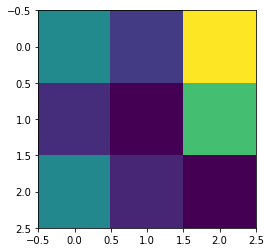

In [29]:
filter_0 = param[0][0][0].detach().numpy()
plt.imshow(filter_0)

In [30]:
input = torch.randn(1, 3, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0057,  0.0881,  0.0677, -0.1107,  0.0984,  0.1495, -0.1497,  0.1345,
         -0.0646,  0.1122]], grad_fn=<AddmmBackward>)


In [0]:
# Zero the gradient buffers of all parameters and backprops with random gradients:

net.zero_grad()
out.backward(torch.randn(1, 10))

In [32]:
# Loss Function
output = net(input)
target = torch.randn(10)  
target = target.view(1, -1) 

criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5365, grad_fn=<MseLossBackward>)


In [0]:
loss.backward()
# net.conv1.weight.grad

In [34]:
net.conv1.weight.grad

tensor([[[[ 6.9617e-04, -1.7919e-03,  1.1023e-03],
          [-4.3083e-03,  1.7434e-03,  5.0246e-04],
          [-9.9402e-05, -1.0948e-03, -3.3256e-04]],

         [[ 2.7307e-03, -3.0266e-03, -6.4053e-04],
          [ 1.6515e-03,  1.6234e-03,  3.3069e-03],
          [ 3.0298e-03,  9.3133e-04, -3.7962e-03]],

         [[-3.5497e-03,  5.8230e-05,  3.9880e-04],
          [ 2.4255e-03,  9.4406e-04,  1.0849e-03],
          [-5.7464e-04,  8.2562e-04,  3.2011e-04]]],


        [[[-4.7780e-04, -5.9420e-04,  6.1455e-04],
          [ 2.3073e-03,  3.1299e-04, -1.7152e-03],
          [-3.3375e-04,  1.6394e-03, -9.7366e-04]],

         [[-9.7701e-04, -1.9447e-03, -1.7753e-03],
          [-2.0725e-03, -2.9437e-03,  5.8072e-03],
          [-3.3656e-04,  1.3094e-03, -5.3325e-03]],

         [[-2.7776e-03, -3.8648e-03, -9.7035e-04],
          [-6.7291e-04, -8.0244e-04, -1.3562e-03],
          [ 7.1039e-06,  1.2386e-03,  1.5196e-03]]],


        [[[-1.1103e-03, -4.6361e-03,  2.5392e-03],
          [ 4.2

In [35]:
import torch.optim as optim

input = torch.randn(1, 3, 32, 32)
out = net(input)
print(out)

optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad() 
print(net.conv1.bias)  
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() 
print(net.conv1.bias) 

tensor([[ 0.0042,  0.0883,  0.0684, -0.1113,  0.1011,  0.1494, -0.1520,  0.1328,
         -0.0656,  0.1143]], grad_fn=<AddmmBackward>)
Parameter containing:
tensor([ 0.1019,  0.1458,  0.1120, -0.1567,  0.1677, -0.1292, -0.0601, -0.0716,
         0.1770,  0.0285, -0.1408, -0.1726,  0.1168, -0.0039,  0.0673,  0.0823,
         0.0970, -0.0347,  0.0605, -0.1653, -0.0644, -0.1434,  0.0256, -0.0674,
        -0.1717,  0.1789, -0.0416,  0.1680, -0.1624,  0.1714,  0.1116,  0.1795,
         0.0813, -0.1619, -0.1416, -0.1701, -0.1900,  0.0045, -0.1037, -0.1283,
        -0.0683,  0.0082, -0.1511,  0.0758,  0.0157, -0.1339, -0.0513,  0.1391,
         0.1585,  0.1912, -0.0748, -0.0752, -0.0051, -0.0208,  0.0676,  0.0427,
         0.1264, -0.1393, -0.1335,  0.0543, -0.1663, -0.1151,  0.1440,  0.0368],
       requires_grad=True)
Parameter containing:
tensor([ 0.1019,  0.1458,  0.1120, -0.1567,  0.1677, -0.1292, -0.0601, -0.0716,
         0.1770,  0.0285, -0.1408, -0.1726,  0.1168, -0.0039,  0.0673,  0

# TRAINING A CLASSIFIER 

[Cifar Data](https://www.cs.toronto.edu/~kriz/cifar.html)

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

https://pytorch.org/docs/stable/torchvision/transforms.html

In [0]:
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [40]:

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)

0it [00:00, ?it/s]

170500096it [00:02, 84683924.30it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


```

        data_path = 'data/train/'
        train_dataset = torchvision.datasets.ImageFolder(
            root=data_path,
            transform=transform
        )
```

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

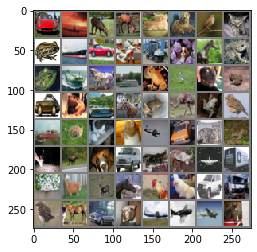

  car plane  deer  deer


In [43]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
net =  Classification()
net = net

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [55]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 0:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.001
[1,   101] loss: 0.115
[1,   201] loss: 0.115
[1,   301] loss: 0.115
[1,   401] loss: 0.115
[1,   501] loss: 0.115
[1,   601] loss: 0.115
[1,   701] loss: 0.115
[2,     1] loss: 0.001
[2,   101] loss: 0.115
[2,   201] loss: 0.115
[2,   301] loss: 0.115
[2,   401] loss: 0.115
[2,   501] loss: 0.115
[2,   601] loss: 0.115
[2,   701] loss: 0.115
Finished Training


In [0]:
PATH = './data/cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [58]:
ls './data/'

cifar-10-batches-py/  cifar-10-python.tar.gz  cifar_net.pth


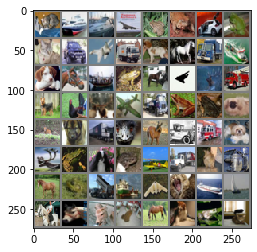

GroundTruth:    cat  ship  ship plane


In [59]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [60]:
net = Classification()
net.load_state_dict(torch.load('./data/cifar_net.pth'))

<All keys matched successfully>

In [0]:
outputs = net(images)

In [62]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  truck truck truck truck


In [63]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


In [64]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck : 100 %


# **What can we do to improve our network?**